# Лабораторная работа №2

## Задание 1. 
###### Провести классификацию найденного датасета, методом машины опорных векторов. В формате Markdown писать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

датасет: [Homicide Reports, 1980-2014](https://www.kaggle.com/datasets/murderaccountability/homicide-reports)

### Загрузка Библиотек

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

### Загрузка данных и предварительная обработка
###### Загрузка данных

In [2]:
data = pd.read_csv('database.csv',low_memory=False)
# Удаление ненужных столбцов
data = data.drop(columns=["Record ID", "Record Source"])
# Заполнение пропущенных значений
data = data.dropna()

###### Выбираем случайное подмножество данных, т.к. загруженный датасет содержит 638 454 записей которые будут обрабатываться слишком долго

In [3]:
subset_data = data.sample(n=11000, random_state=42)

subset_data.head() # Просмотр первых нескольких строк данных

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,...,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
484984,CA03612,Victorville,Municipal Police,San Bernardino,California,2005,July,1,Murder or Manslaughter,No,...,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,1,0
608445,TX10100,Harris County,Sheriff,Harris,Texas,2013,May,3,Murder or Manslaughter,No,...,White,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0
417612,AR06200,St. Francis,Sheriff,St. Francis,Arkansas,2001,June,1,Murder or Manslaughter,Yes,...,Black,Not Hispanic,Male,18,Black,Not Hispanic,Acquaintance,Handgun,0,0
372692,AZ01003,Tucson,Municipal Police,Pima,Arizona,1998,March,6,Murder or Manslaughter,No,...,White,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0
402028,WA02400,Okanogan,Sheriff,Okanogan,Washington,1999,August,1,Murder or Manslaughter,Yes,...,White,Unknown,Male,20,White,Unknown,Girlfriend,Rifle,0,0


###### Выбор признаков и целевой переменной

In [4]:
X = subset_data[['Victim Age', 'Victim Race', 'Victim Sex', 'Perpetrator Age', 'Perpetrator Race', 'Perpetrator Sex']]
Y = subset_data['Crime Solved'] 

###### Преобразование категориальных признаков в числовые

In [5]:
X = pd.get_dummies(X)

###### Разделение данных на обучающий и тестовый наборы

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

###### Масштабирование данных
__*fit_transform*__ вычисляет среднее значение и стандартное отклонение для каждого признака на обучающем наборе данных

__*transform*__ применяет параметры масштабирования, вычисленные на обучающем наборе данных, к тестовому набору данных

In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Выбор гиперпараметров SVM
Теперь мы можем использовать перекрестную проверку (cross-validation) для выбора оптимальных гиперпараметров SVM, таких как тип ядра (kernel), параметр регуляризации C и гамма (для ядер rbf, poly и sigmoid).

In [8]:
from sklearn.model_selection import GridSearchCV

# Определение пространства поиска гиперпараметров
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

svm = SVC() # Создание модели SVM

In [9]:
# Поиск оптимальных гиперпараметров с помощью перекрестной проверки
### grid_search = GridSearchCV(svm, param_grid, cv=5) # <- если параметры надо сначало найти

In [10]:
###grid_search.fit(X_train_scaled, Y_train)           # <- если параметры надо сначало найти

# Вывод наилучших гиперпараметров
### print("Наилучшие гиперпараметры:", grid_search.best_params_)

### Обучение и оценка модели SVM
После выбора оптимальных гиперпараметров мы можем обучить модель SVM на обучающей выборке и оценить ее производительность на тестовой выборке.

In [11]:
# Создание модели SVM с оптимальными гиперпараметрами
# Оптимальные гиперпараметры
best_params = {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

# Создание модели SVM с оптимальными гиперпараметрами
### best_svm = grid_search.best_estimator_ # <- если параметры надо сначало найти
# Создание модели SVM с оптимальными гиперпараметрами
best_svm = SVC(**best_params)              # <- если параметры уже известны

In [12]:
# Обучение модели на обучающей выборке
best_svm.fit(X_train_scaled, Y_train)

SVC(C=0.1, kernel='linear')

In [13]:
# Оценка производительности модели на тестовой выборке
Y_pred = best_svm.predict(X_test_scaled)

In [14]:
# Оценка производительности модели
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
print(classification_report(Y_test, Y_pred))

Accuracy: 0.9995454545454545
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       650
         Yes       1.00      1.00      1.00      1550

    accuracy                           1.00      2200
   macro avg       1.00      1.00      1.00      2200
weighted avg       1.00      1.00      1.00      2200



###### Precision (точность): __TP / (TP + FP)__
Это показатель того, как много из предсказанных положительных случаев действительно являются положительными. 

###### Recall (полнота): __TP / (TP + FN)__
Это показатель того, как много реальных положительных случаев модель предсказала правильно.

###### F1-score: __2 * (precision * recall) / (precision + recall)__
Это гармоническое среднее между precision и recall. Это показатель общей производительности классификатора. 

###### Support: 
Это количество фактических вхождений каждого класса в тестовом наборе данных
___
###### Accuracy (точность) __(TP + TN) / (TP + TN + FP + FN)__ 
Это процент правильно классифицированных случаев. 

- TP - количество верно предсказанных положительных случаев 
- TN - количество верно предсказанных отрицательных случаев 
- FP - количество ложно предсказанных положительных случаев 
- FN - количество ложно предсказанных отрицательных случаев 

###### Macro avg: 
Средние значения __precision__, __recall__ и __f1-score__ по всем классам без учета их дисбаланса.

###### Weighted avg: 
Средние значения __precision__, __recall__ и __f1-score__ по всем классам, учитывая их дисбаланс по количеству.

### Визуализация данных

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

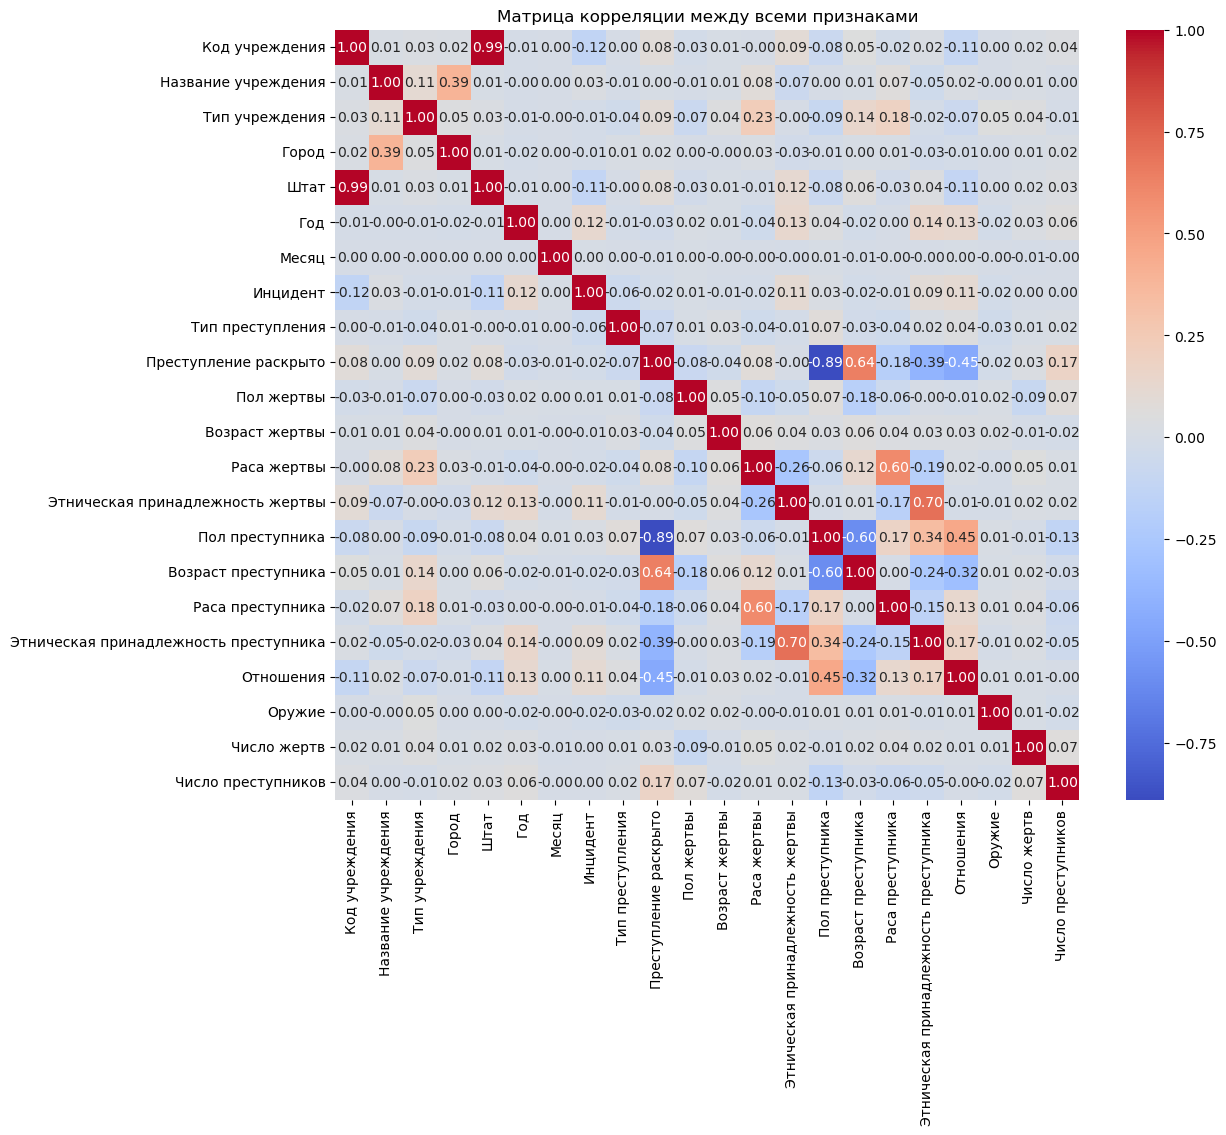

In [16]:
# Создание словаря с переводами
translation_dict = {
    "Agency Code"          : "Код учреждения"                       ,
    "Agency Name"          : "Название учреждения"                  ,
    "Agency Type"          : "Тип учреждения"                       ,
    "City"                 : "Город"                                ,
    "State"                : "Штат"                                 ,
    "Year"                 : "Год"                                  ,
    "Month"                : "Месяц"                                ,
    "Incident"             : "Инцидент"                             ,
    "Crime Type"           : "Тип преступления"                     ,
    "Crime Solved"         : "Преступление раскрыто"                ,
    "Victim Sex"           : "Пол жертвы"                           ,
    "Victim Age"           : "Возраст жертвы"                       ,
    "Victim Race"          : "Раса жертвы"                          ,
    "Victim Ethnicity"     : "Этническая принадлежность жертвы"     ,
    "Perpetrator Sex"      : "Пол преступника"                      ,
    "Perpetrator Age"      : "Возраст преступника"                  ,
    "Perpetrator Race"     : "Раса преступника"                     ,
    "Perpetrator Ethnicity": "Этническая принадлежность преступника",
    "Relationship"         : "Отношения"                            ,
    "Weapon"               : "Оружие"                               ,
    "Victim Count"         : "Число жертв"                          ,
    "Perpetrator Count"    : "Число преступников"
}
subset_data_forMatrix = data
# Переименование столбцов согласно словарю
subset_data_forMatrix = subset_data_forMatrix.rename(columns=translation_dict)


label_encoders = {}
for column in subset_data_forMatrix.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    subset_data_forMatrix[column] = label_encoders[column].fit_transform(subset_data_forMatrix[column])

# Создание матрицы корреляции
data_corr_matrix = subset_data_forMatrix.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(12, 10))
sns.heatmap(data_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции между всеми признаками')
plt.show()